In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import xgboost as xgb
# !pip install shap
# import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_features = '/content/drive/My Drive/DS4B/cleaned_train_norm.csv'
lasso_features = '/content/drive/My Drive/DS4B/cleaned_trained_norm_lasso_features.csv'

# XGBoost on ALL Features

In [ ]:
data = pd.read_csv(all_features)

In [ ]:
data.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MSSubClass_80,MSSubClass_85,MSSubClass_90,AgeAtSale,GarageAgeAtSale,YearsSinceRemodel,TotalBathrooms,TotalBsmtBathrooms,TotalPorchArea,SalePrice
0,0.150685,0.033420,1.000000,1.0,0.666667,0.500,0.12250,0.666667,0.5,0.8,...,0.0,0.0,0.0,0.036765,0.002488,0.098361,0.714286,0.333333,0.059396,208500
1,0.202055,0.038795,1.000000,1.0,0.555556,0.875,0.00000,0.333333,0.5,0.8,...,0.0,0.0,0.0,0.227941,0.015423,0.524590,0.571429,0.166667,0.000000,181500
2,0.160959,0.046507,0.666667,1.0,0.666667,0.500,0.10125,0.666667,0.5,0.8,...,0.0,0.0,0.0,0.051471,0.003483,0.114754,0.714286,0.333333,0.040896,223500
3,0.133562,0.038561,0.666667,1.0,0.666667,0.500,0.00000,0.333333,0.5,0.6,...,0.0,0.0,0.0,0.669118,0.003980,0.606557,0.285714,0.333333,0.298929,140000
4,0.215753,0.060576,0.666667,1.0,0.777778,0.500,0.21875,0.666667,0.5,0.8,...,0.0,0.0,0.0,0.058824,0.003980,0.147541,0.714286,0.333333,0.081792,250000


In [ ]:
print(data.columns.tolist())

['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'Alley_Grvl', 'Alley_Pave', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LandContour_HLS', 'L

pandas.core.indexes.base.Index

In [ ]:
data.describe()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MSSubClass_80,MSSubClass_85,MSSubClass_90,AgeAtSale,GarageAgeAtSale,YearsSinceRemodel,TotalBathrooms,TotalBsmtBathrooms,TotalPorchArea,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,0.167287,0.043036,0.863636,0.968664,0.565886,0.572400,0.064803,0.463958,0.521006,0.697245,...,0.039945,0.013774,0.035813,0.269846,0.069555,0.394097,0.500984,0.150826,0.084616,180615.063361
std,0.075469,0.046692,0.194298,0.138477,0.153477,0.139142,0.113166,0.190924,0.087991,0.175456,...,0.195897,0.116592,0.185887,0.222369,0.226296,0.338496,0.181607,0.171640,0.102511,79285.541485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.133562,0.029161,0.666667,1.000000,0.444444,0.500000,0.000000,0.333333,0.500000,0.600000,...,0.000000,0.000000,0.000000,0.058824,0.003483,0.081967,0.285714,0.000000,0.000000,129900.000000
50%,0.164384,0.038227,1.000000,1.000000,0.555556,0.500000,0.000000,0.333333,0.500000,0.800000,...,0.000000,0.000000,0.000000,0.257353,0.014925,0.245902,0.571429,0.000000,0.046738,162700.000000
75%,0.198630,0.048143,1.000000,1.000000,0.666667,0.625000,0.103750,0.666667,0.500000,0.800000,...,0.000000,0.000000,0.000000,0.398897,0.024876,0.688525,0.714286,0.333333,0.132425,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [ ]:
non_numeric_columns = data.select_dtypes(exclude=['int', 'float']).columns
len(non_numeric_columns)

0

In [ ]:
len(data.columns)

214

In [ ]:
# # Select non-numeric columns
# non_numeric_columns = data.select_dtypes(include=['object', 'category', 'bool'])

# # Calculate the number of unique values in each non-numeric column
# unique_counts = non_numeric_columns.nunique().sort_values()

# print(unique_counts)

In [ ]:
# non_null_columns = non_numeric_columns.columns[non_numeric_columns.isnull().sum() == 0]

# print(non_null_columns)

In [ ]:
# def label_encode_column(column):
#     if column.dtype == bool:
#         # Convert boolean to int directly (True to 1, False to 0)
#         return column.astype(int)
#     else:
#         # Apply label encoding for other non-numeric types
#         encoder = LabelEncoder()
#         return encoder.fit_transform(column.fillna('Missing'))

# # Apply label encoding to each non-numeric column
# for col in non_numeric_columns:
#     df[col] = label_encode_column(df[col])

In [ ]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (1161, 213)
Testing features shape: (291, 213)
Training labels shape: (1161,)
Testing labels shape: (291,)


In [ ]:
model = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

# Predict using the best model
y_pred = grid_search.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
RMSE: 22326.7180351001


In [ ]:
grid_search.best_params_['colsample_bytree']

1

In [ ]:
model = xgb.XGBRegressor(
    colsample_bytree= 0.8, #grid_search.best_params_['colsample_bytree'],
    learning_rate= 0.05, #grid_search.best_params_['learning_rate'],
    max_depth= 3, #grid_search.best_params_['max_depth'],
    n_estimators= 300, #grid_search.best_params_['n_estimators'],
    subsample= 1, #grid_search.best_params_['subsample'],
    objective='reg:squarederror'  # To avoid a deprecation warning, specify the objective function
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate rmse
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

RMSE: 22326.7180351001
R-squared: 0.9183682933913073


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


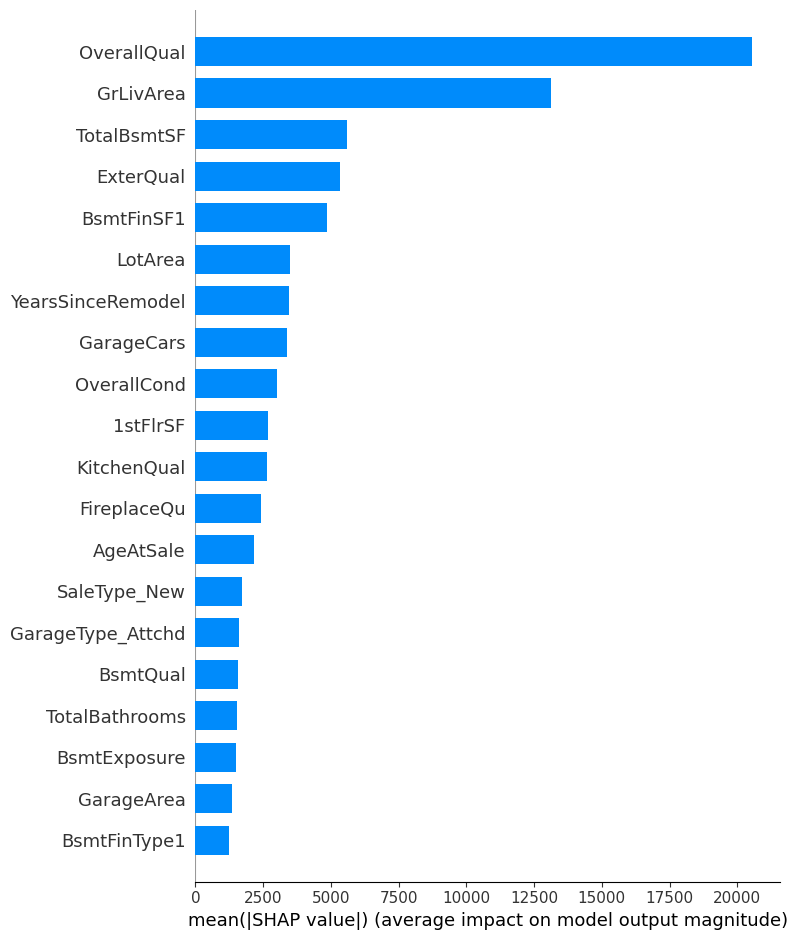

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# XGBoost with Lasso Features

In [ ]:
data = pd.read_csv(lasso_features)

In [ ]:
data.head()

,Unnamed: 0,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,...,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_90,AgeAtSale,GarageAgeAtSale,TotalBathrooms,TotalBsmtBathrooms,TotalPorchArea,SalePrice
0,0,0.033420,1.0,0.666667,0.500,0.12250,0.666667,0.8,0.75,0.25,...,0.0,0.0,1.0,0.0,0.036765,0.002488,0.714286,0.333333,0.059396,208500
1,1,0.038795,1.0,0.555556,0.875,0.00000,0.333333,0.8,0.75,1.00,...,1.0,0.0,0.0,0.0,0.227941,0.015423,0.571429,0.166667,0.000000,181500
2,2,0.046507,1.0,0.666667,0.500,0.10125,0.666667,0.8,0.75,0.50,...,0.0,0.0,1.0,0.0,0.051471,0.003483,0.714286,0.333333,0.040896,223500
3,3,0.038561,1.0,0.666667,0.500,0.00000,0.333333,0.6,1.00,0.25,...,0.0,0.0,0.0,0.0,0.669118,0.003980,0.285714,0.333333,0.298929,140000
4,4,0.060576,1.0,0.777778,0.500,0.21875,0.666667,0.8,0.75,0.75,...,0.0,0.0,1.0,0.0,0.058824,0.003980,0.714286,0.333333,0.081792,250000


In [ ]:
data.describe()

,Unnamed: 0,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,...,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_90,AgeAtSale,GarageAgeAtSale,TotalBathrooms,TotalBsmtBathrooms,TotalPorchArea,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,725.500000,0.043036,0.968664,0.565886,0.572400,0.064803,0.463958,0.697245,0.733471,0.407886,...,0.366391,0.099174,0.203857,0.035813,0.269846,0.069555,0.500984,0.150826,0.084616,180615.063361
std,419.300608,0.046692,0.138477,0.153477,0.139142,0.113166,0.190924,0.175456,0.138238,0.266906,...,0.481984,0.298998,0.403003,0.185887,0.222369,0.226296,0.181607,0.171640,0.102511,79285.541485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,362.750000,0.029161,1.000000,0.444444,0.500000,0.000000,0.333333,0.600000,0.750000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.003483,0.285714,0.000000,0.000000,129900.000000
50%,725.500000,0.038227,1.000000,0.555556,0.500000,0.000000,0.333333,0.800000,0.750000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.257353,0.014925,0.571429,0.000000,0.046738,162700.000000
75%,1088.250000,0.048143,1.000000,0.666667,0.625000,0.103750,0.666667,0.800000,0.750000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.398897,0.024876,0.714286,0.333333,0.132425,214000.000000
max,1451.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 90 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1452 non-null   int64  
 1   LotArea               1452 non-null   float64
 2   LandSlope             1452 non-null   float64
 3   OverallQual           1452 non-null   float64
 4   OverallCond           1452 non-null   float64
 5   MasVnrArea            1452 non-null   float64
 6   ExterQual             1452 non-null   float64
 7   BsmtQual              1452 non-null   float64
 8   BsmtCond              1452 non-null   float64
 9   BsmtExposure          1452 non-null   float64
 10  BsmtFinType1          1452 non-null   float64
 11  BsmtFinType2          1452 non-null   float64
 12  BsmtUnfSF             1452 non-null   float64
 13  HeatingQC             1452 non-null   float64
 14  2ndFlrSF              1452 non-null   float64
 15  GrLivArea            

In [ ]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (1161, 88)
Testing features shape: (291, 88)
Training labels shape: (1161,)
Testing labels shape: (291,)


In [ ]:
model = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

# Predict using the best model
y_pred = grid_search.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)
RMSE: 23276.638002080254


In [ ]:
model = xgb.XGBRegressor(
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    subsample=grid_search.best_params_['subsample'],
    objective='reg:squarederror'  # To avoid a deprecation warning, specify the objective function
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 23276.638002080254
